In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
# Se importa la herramienta para leer los archivos binarios.
import flopy.utils.binaryfile as bf

flopy is installed in /home/luiggi/anaconda3/lib/python3.7/site-packages/flopy


In [6]:
name5 = 'twri'
# Lectura de la salida de MODFLOW
hds = bf.HeadFile(name5 + '.hds')
head5 = hds.get_data()

In [7]:
name6 = 'twri6'
# Lectura de la salida de MODFLOW
hds = bf.HeadFile(name6 + '.hds')
head6 = hds.get_data()

In [8]:
levels = 50
salto = 5
Lx = 75000
Ly = 75000
nx = 15
ny = 15
dx = Lx / nx
dy = Ly / ny
extent = (0,Lx,0,Ly)

ticks = np.arange(0,75000+dx,dx)
#labels = np.arange(0,80,5)
labels = [i for i in range(16)]

wells = [( 6,12), ( 9, 8), ( 9,10), ( 9,12), ( 9,14), 
         (11, 8), (11,10), (11,12), (11,14), (13, 8), 
         (13,10), (13,12), (13,14),
         ( 4, 6), ( 5,11)]

drains = [(8,2),(8,3),(8,4),(8,5),(8,6),(8,7),(8,8),(8,9),(8,10)]
xc = np.arange(-dx*0.5, Lx+dx, dx)
yc = np.arange(-dy*0.5, Ly+dy, dy)

In [51]:
def grafica_layer(head, layer, title):
    mapa_color = 'cool'
    fig = plt.figure(figsize=(8, 8))

    plt.ylim(Ly+dy, -dy)
    plt.xlim(-dx, Lx+dx)
    c1f = plt.contourf(head[layer-1, :, :], levels=levels, extent=extent, cmap=mapa_color)
    c1 = plt.contour(head[layer-1, :, :], levels=int(levels/salto), extent=extent, colors='black', linewidths=1.0)
    plt.clabel(c1, inline=1, fontsize=10)
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.yticks(ticks=ticks, labels=labels)
    plt.xticks(ticks=ticks, labels=labels)
    plt.ylabel('Rows')
    plt.xlabel('Columns')

    if layer == 1:
        for c in wells[:-2]:
            plt.scatter(xc[c[1]], yc[c[0]], color='blue')

        for c in drains:
            plt.scatter(xc[c[1]], yc[c[0]], color='green')
            
    elif layer == 2:
        plt.scatter(xc[6], yc[4], color='red')
        
    elif layer == 3:
        plt.scatter(xc[11], yc[5], color='orange')
        
    plt.grid()

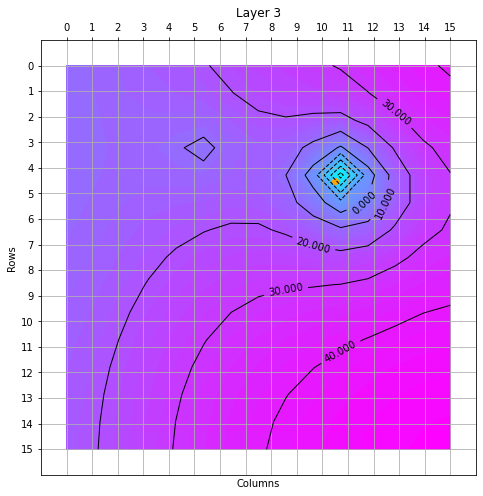

In [59]:
grafica_layer(head6, 3, 'Layer 3')
plt.savefig('mf6_3.png')

In [48]:
def grafica(head, title):
    mapa_color = 'cool'
    fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    fig.subplots_adjust(hspace=0.3)

    axs[0].set_ylim(Ly+dy, -dy)
    axs[0].set_xlim(-dx, Lx+dx)
    c1f = axs[0].contourf(head[0, :, :], levels=levels, extent=extent, cmap=mapa_color)
    c1 = axs[0].contour(head[0, :, :], levels=int(levels/salto), extent=extent, colors='black', linewidths=1.0)
    axs[0].clabel(c1, inline=1, fontsize=10)
    axs[0].set_aspect('equal')
    axs[0].set_title('Layer 1')
    axs[0].set_yticks(ticks=ticks)
    axs[0].set_yticklabels(labels=labels)
    axs[0].set_xticks(ticks=ticks)
    axs[0].set_xticklabels(labels=labels)
    axs[0].set_ylabel('Rows')
    axs[0].set_xlabel('Columns')

    for c in wells[:-2]:
        axs[0].scatter(xc[c[1]], yc[c[0]], color='blue')

    for c in drains:
        axs[0].scatter(xc[c[1]], yc[c[0]], color='green')
    
    axs[0].grid()

    axs[1].set_ylim(Ly+dy, -dy)
    axs[1].set_xlim(-dx, Lx+dx)
    c2f = axs[1].contourf(head[1, :, :], levels=levels, extent=extent, cmap=mapa_color)
    c2 = axs[1].contour(head[1, :, :], levels=int(levels/salto),  extent=extent, colors='black', linewidths=1.0)
    axs[1].clabel(c2, inline=1, fontsize=10)
    axs[1].set_aspect('equal')
    axs[1].set_title('Layer 2')
    axs[1].set_xticks(ticks=ticks)
    axs[1].set_xticklabels(labels=labels)

    axs[1].scatter(xc[6], yc[4], color='red')

    axs[1].grid()

    axs[2].set_ylim(Ly+dy, -dy)
    axs[2].set_xlim(-dx, Lx+dx)
    c3f = axs[2].contourf(head[2, :, :], levels=levels, extent=extent, cmap=mapa_color)
    c3 = axs[2].contour(head[2, :, :], levels=int(levels/salto),  extent=extent, colors='black', linewidths=1.0)
    axs[2].clabel(c3, inline=1, fontsize=10)
    axs[2].set_aspect('equal')
    axs[2].set_title('Layer 3')
    axs[2].set_xticks(ticks=ticks)
    axs[2].set_xticklabels(labels=labels)

    axs[2].scatter(xc[11], yc[5], color='orange')

    axs[2].grid()

    #fig.colorbar(c2f, ax=axs[3], orientation='vertical', shrink = 0.75, label='$h$')
    fig.tight_layout()
    fig.suptitle(title, y=1.025, fontsize=20)

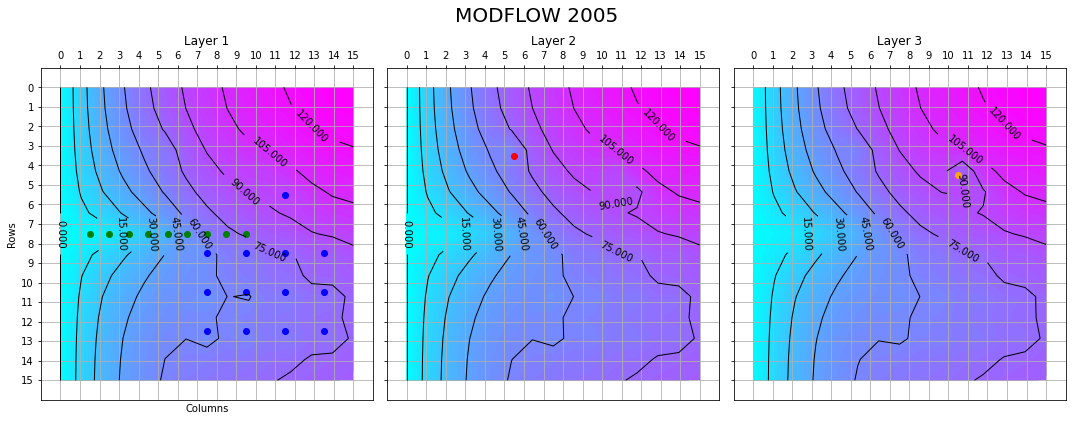

In [49]:
grafica(head5, title='MODFLOW 2005')
plt.savefig('mf5_twri.png')

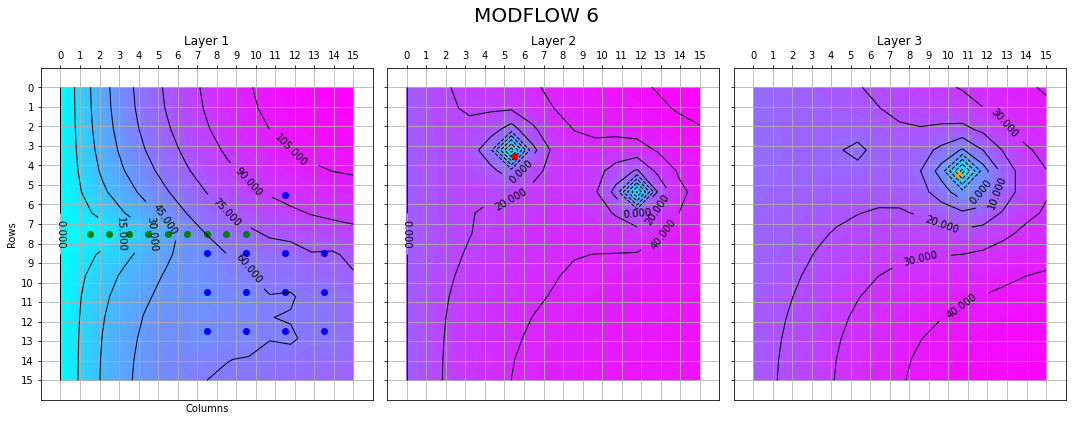

In [50]:
grafica(head6, title = 'MODFLOW 6')

In [62]:

# Se obtiene la información del archivo con extensión .cbc
print(name6 + '.cbb')
cbb = bf.CellBudgetFile(name6 + '.cbb')

twri6.cbb


OSError: [Errno 22] Invalid argument